In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import contractions
import emoji
import seaborn as sns
from collections import Counter
import nltk
import random

In [9]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
df1 = pd.read_csv('../data/adidas_usa.csv')
df2 = pd.read_csv('../data/amazon_co-ecommerce_sample.csv')
df3 = pd.read_csv('../data/data_amazon.xlsx - Sheet1.csv')
df4 = pd.read_csv('../data/fashionnova_reviews.csv')
df5 = pd.read_csv('../data/TeePublic_review.csv', encoding='latin-1')

In [21]:
df5.rename(columns={'review-label': 'rating'}, inplace=True)
df3.rename(columns={'Cons_rating': 'rating', 'Review': 'review'}, inplace=True)
df4.rename(columns={'Rating': 'rating', 'Review Text': 'review'}, inplace=True)

def extract_rating(text):
    match = re.search(r'Rated (\d+(\.\d+)?)', text)
    if match:
        return float(match.group(1))

    try:
        return pd.to_numeric(text, errors='coerce')
    except ValueError:
        return None

extracted_ratings = df4['rating'].apply(extract_rating)
df4.loc[:, 'rating'] = extracted_ratings

def standardize(df):
  df['rating'] = df['rating'].astype('float64')
  return df

df3 = standardize(df3.copy())
df4 = standardize(df4.copy())
df5 = standardize(df5.copy())

In [22]:
df1.head(1)

,index,url,name,sku,selling_price,original_price,currency,availability,color,category,...,source_website,breadcrumbs,description,brand,images,country,language,average_rating,reviews_count,crawled_at
0,0,https://www.adidas.com/us/beach-shorts/FJ5089....,Beach Shorts,FJ5089,40,NaN,USD,InStock,Black,Clothing,...,https://www.adidas.com,Women/Clothing,Splashing in the surf. Making memories with yo...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.5,35,2021-10-23 17:50:17.331255


In [23]:
df2.head(1)

,index,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."


In [24]:
df3.head(1)

,Title,review,rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0


In [25]:
df4.head(1)

,Reviewer Name,Profile Link,Country,Review Count,Review Date,rating,Review Title,review,Date of Experience
0,Champagne,/users/66c78240087b6269ffbcb5fb,US,1 review,2024-08-22T20:24:02.000Z,5.0,I love ordering from fashion nova,I love ordering from fashion nova. The clothes...,"August 22, 2024"


In [26]:
df5.head(1)

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,rating
0,0.0,US,37.09024,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5.0


In [27]:
print(df1.info())
print('-------------------------------------------------------------')
print(df2.info())
print('-------------------------------------------------------------')
print(df3.info())
print('-------------------------------------------------------------')
print(df4.info())
print('-------------------------------------------------------------')
print(df5.info())
print('-------------------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           845 non-null    int64  
 1   url             845 non-null    object 
 2   name            845 non-null    object 
 3   sku             845 non-null    object 
 4   selling_price   845 non-null    int64  
 5   original_price  829 non-null    object 
 6   currency        845 non-null    object 
 7   availability    845 non-null    object 
 8   color           845 non-null    object 
 9   category        845 non-null    object 
 10  source          845 non-null    object 
 11  source_website  845 non-null    object 
 12  breadcrumbs     845 non-null    object 
 13  description     845 non-null    object 
 14  brand           845 non-null    object 
 15  images          845 non-null    object 
 16  country         845 non-null    object 
 17  language        845 non-null    obj

In [33]:
merged_df = pd.concat([df3[['review', 'rating']], df4[['review', 'rating']], df5[['review', 'rating']]], ignore_index=True)
merged_df = merged_df.dropna()
df = merged_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427872 entries, 0 to 459417
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   review  427872 non-null  object 
 1   rating  427872 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.8+ MB


In [15]:
df = pd.read_csv('dataset.csv')

In [16]:
df.drop_duplicates(subset=['review'], keep='first', inplace=True)
df.dropna(subset=['review', 'rating'], inplace=True)

In [17]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [18]:
def clean(text):
    text = contractions.fix(text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = emoji.replace_emoji(text, replace='')
    text = re.sub(r"[^a-zA-Z\s]", "", text)    
    text = text.lower()
    text = str(TextBlob(text).correct())
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    cleaned_text = " ".join(words)
    
    return cleaned_text

In [ ]:
df['cleaned_review'] = df['review'].apply(clean)

Pandas Apply: 100%|██████████| 384517/384517 [11:48:13<00:00,  9.05it/s]   


In [20]:
df[['review', 'cleaned_review', 'rating']].head()

,review,cleaned_review,rating
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silk sex comfortable,4.0
1,Love this dress! it's sooo pretty. i happene...,love dress soon pretty happened find store gla...,5.0
2,I had such high hopes for this dress and reall...,high hope dress really wanted work initially o...,3.0
3,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirt fabulous eve...,5.0
4,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...,5.0


In [2]:
# df.to_csv('cleaned_dataset.csv', index=False)
df = pd.read_csv('cleaned_dataset.csv')

In [ ]:
def get_review_length(review):
  if isinstance(review, str):
    return len(review.split())
  else:
    return 0

df['review_length'] = df['cleaned_review'].apply(get_review_length)

In [11]:
def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['rating'].apply(label_sentiment)

In [14]:
df.head(10)

,review,rating,cleaned_review,review_length,sentiment
0,Absolutely wonderful - silky and sexy and comf...,4.0,absolutely wonderful silk sex comfortable,5,positive
1,Love this dress! it's sooo pretty. i happene...,5.0,love dress soon pretty happened find store gla...,27,positive
2,I had such high hopes for this dress and reall...,3.0,high hope dress really wanted work initially o...,48,neutral
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0,love love love jumpsuit fun flirt fabulous eve...,14,positive
4,This shirt is very flattering to all due to th...,5.0,shirt flattering due adjustable front tie perf...,16,positive
5,"I love tracy reese dresses, but this one is no...",2.0,love trace goose dress one petite foot tall us...,40,negative
6,I aded this in my basket at hte last mintue to...,5.0,added basket last minute see would look like p...,41,positive
7,"I ordered this in carbon for store pick up, an...",4.0,ordered carbon store pick ton stuff always try...,48,positive
8,I love this dress. i usually get an xs but it ...,5.0,love dress usually get run little snug bust or...,16,positive
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5.0,le ordered petite make sure length long typica...,32,positive


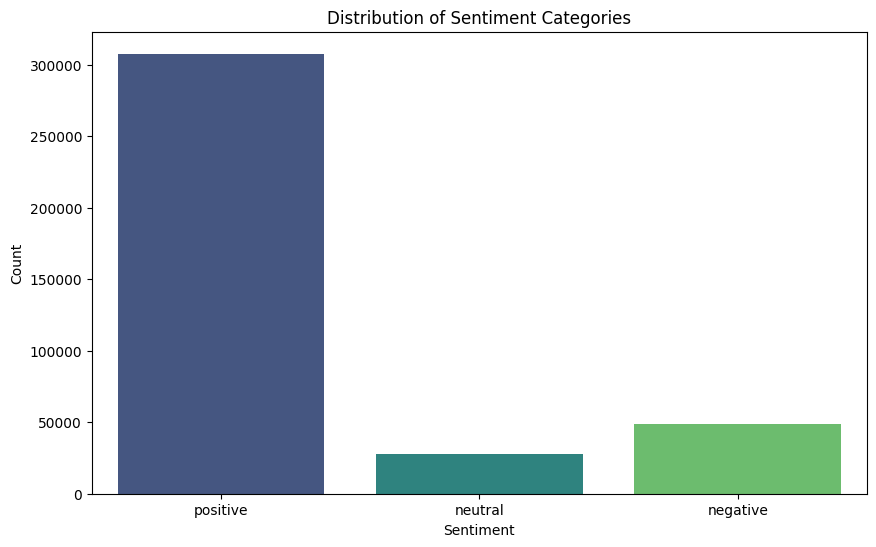

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title("Distribution of Sentiment Categories")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

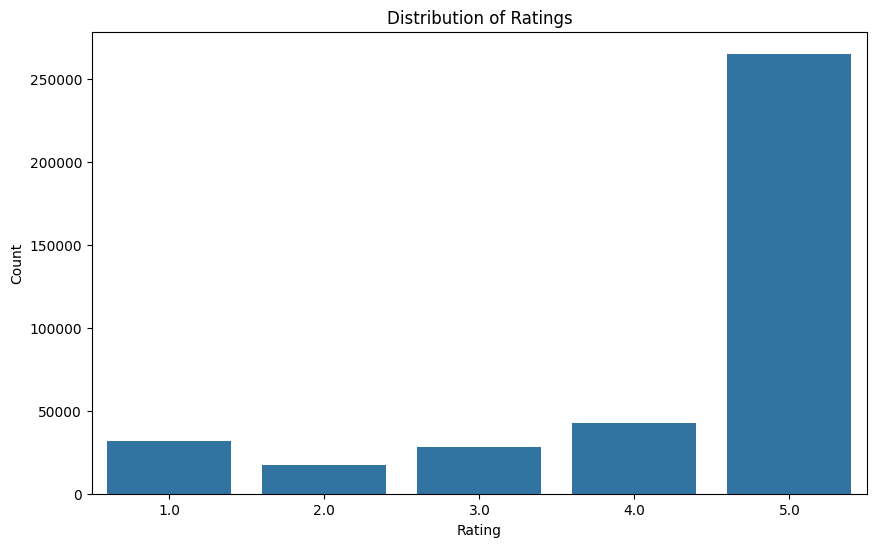

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

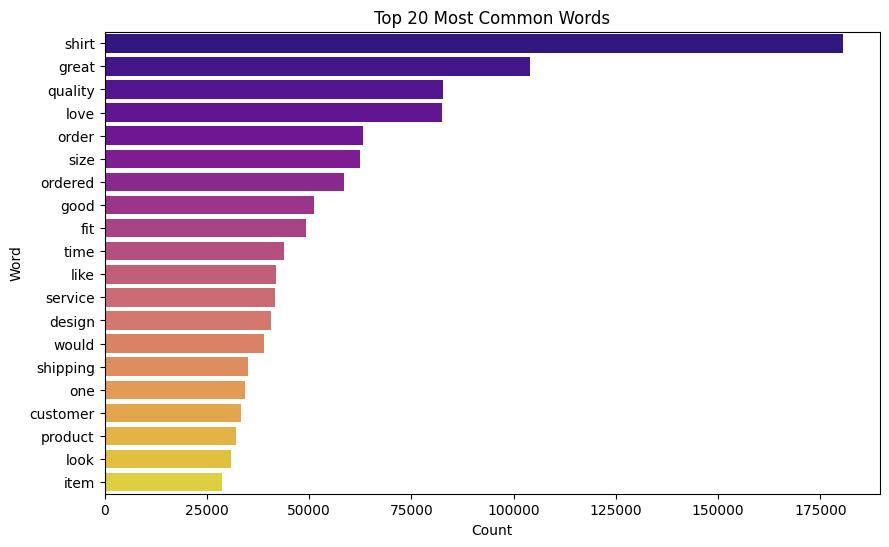

In [26]:
all_words = ' '.join(df['cleaned_review']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='plasma')
plt.title('Top 20 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [27]:
df.to_csv('processed_dataset.csv', index=False)